# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how= "outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].unique())
print(number_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = combined_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)

dupe_mice_id = combined_df.loc[dupe_mice, "Mouse ID"].unique()
print(dupe_mice_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dupe_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_no_dupe = pd.DataFrame(combined_df.loc[combined_df["Mouse ID"] != "g989", :])
combined_no_dupe                

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(combined_no_dupe["Mouse ID"].unique())
print(new_mice_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Mean
mean = combined_no_dupe.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
# Median
median = combined_no_dupe.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
# Variance
variance = combined_no_dupe.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
# Standard Deviation
standard_dev = combined_no_dupe.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
#SEM
sem = combined_no_dupe.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
tumor_table = pd.DataFrame({"Mean Tumor Volume": mean, 
                            "Median Tumor Volume": median, 
                            "Tumor Volume Variance": variance, 
                            "Tumor Volume Std. Dev.": standard_dev,
                            "Tumor Volume Std. Err.": sem})

tumor_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = combined_no_dupe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_method_df = agg_method.rename(columns={ "mean" : "Mean",
                                          "median" : "Median",
                                          "var" : "Variance",
                                          "std" : "Standard Dev",
                                          "sem" : "Standard Error"})
agg_method_df

Tumor Volume (mm3)                                     \
                           Mean     Median   Variance Standard Dev   
Drug Regimen                                                         
Capomulin             40.675741  41.557809  24.947764     4.994774   
Ceftamin              52.591172  51.776157  39.290177     6.268188   
Infubinol             52.884795  51.820584  43.128684     6.567243   
Ketapril              55.235638  53.698743  68.553577     8.279709   
Naftisol              54.331565  52.509285  66.173479     8.134708   
Placebo               54.033581  52.288934  61.168083     7.821003   
Propriva              52.320930  50.446266  43.852013     6.622085   
Ramicane              40.216745  40.673236  23.486704     4.846308   
Stelasyn              54.233149  52.431737  59.450562     7.710419   
Zoniferol             53.236507  51.818479  48.533355     6.966589   

                             
             Standard Error  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.544332  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

## Bar and Pie Charts

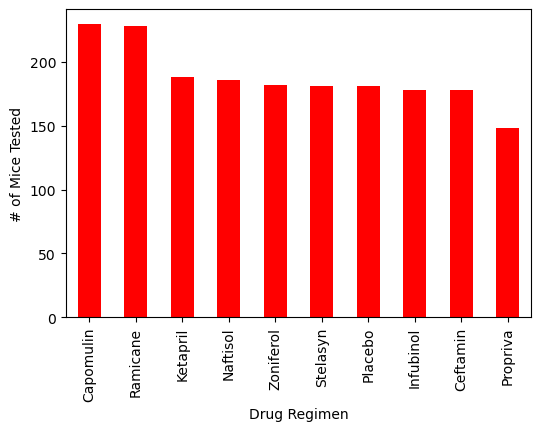

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = combined_no_dupe["Drug Regimen"].value_counts()
bar_chart.plot(x = "Drug Regimen", y = "# of Mice Tested" ,kind = "bar", color = "r", figsize = (6,4))
plt.ylabel("# of Mice Tested")
plt.show()

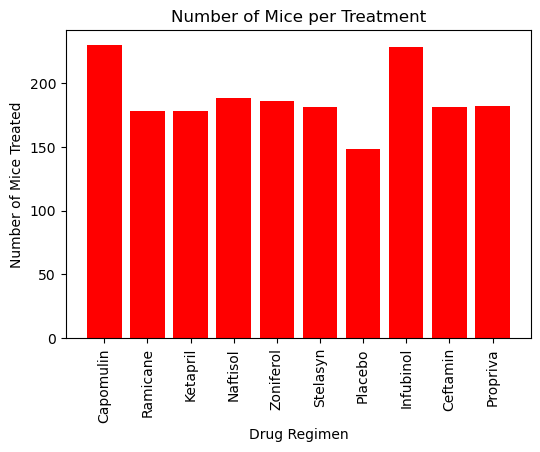

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bar_chart_pyplot = (combined_no_dupe.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
bar_chart_pyplot

x_axis = np.arange(len(bar_chart))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(6,4))
plt.xticks(tick_locations, bar_chart.index.values, rotation="vertical")
plt.bar(x_axis, bar_chart_pyplot, color='r', alpha=1, align="edge")
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

plt.show()

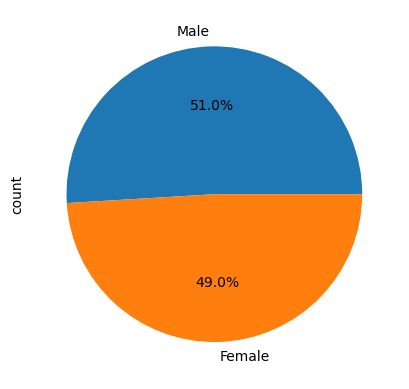

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = combined_no_dupe["Sex"].value_counts()
mouse_gender.plot(kind="pie",autopct="%1.1f%%")
plt.show()

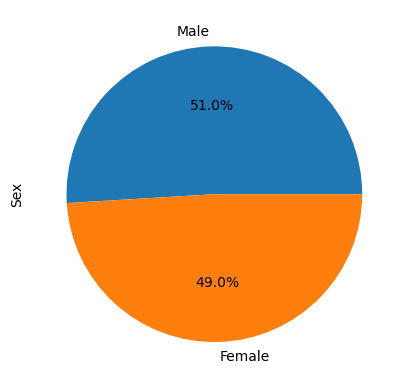

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender, labels=("Male", "Female"), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = combined_no_dupe.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_no_dupe_merge = greatest_timepoint.merge(combined_no_dupe, on=["Mouse ID", "Timepoint"], how="left")

combined_no_dupe_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_loop = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_loop:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = combined_no_dupe_merge.loc[combined_no_dupe_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

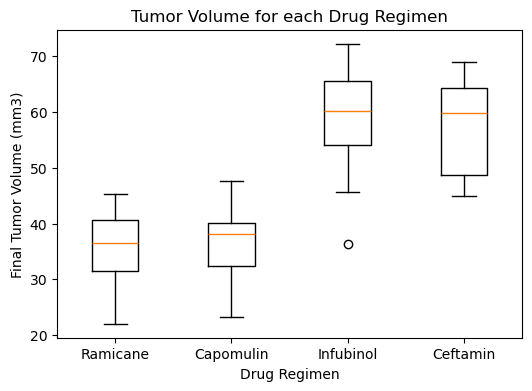

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize = (6,4))
ax1.set_title("Tumor Volume for each Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volume_data, labels=treatment_loop, widths = 0.4,vert=True)
plt.show()

## Line and Scatter Plots

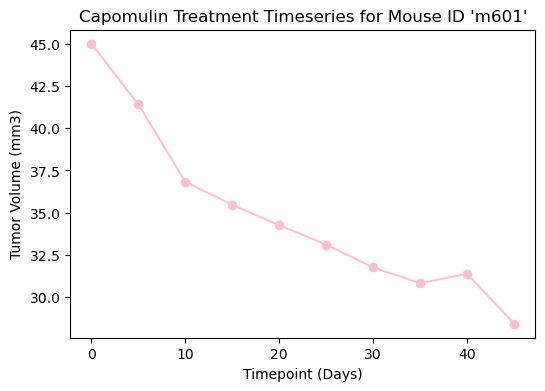

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_no_dupe.loc[combined_no_dupe["Drug Regimen"] == "Capomulin", :]
capomulin_data

capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "m601", :]
capomulin_mouse

x_axis = capomulin_mouse["Timepoint"]
capomulin_mouse_tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(6,4))
plt.title("Capomulin Treatment Timeseries for Mouse ID 'm601'")
plt.plot(x_axis, capomulin_mouse_tumor_volume, marker="o",color="pink", label="mm3")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

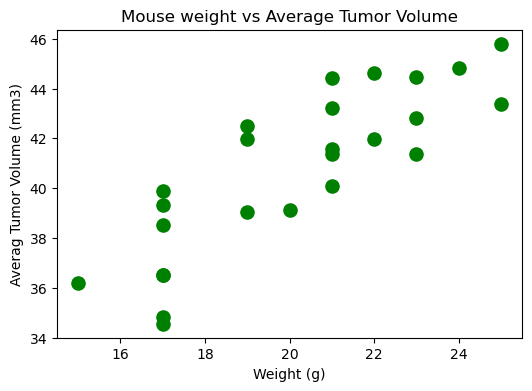

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight_tumor_volume = capomulin_data.groupby(["Mouse ID"]).mean(numeric_only=True)

fig1, ax1 = plt.subplots(figsize=(6,4))
plt.scatter(capomulin_weight_tumor_volume['Weight (g)'],capomulin_weight_tumor_volume['Tumor Volume (mm3)'],s=90, color="green")
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin Regimen is: 0.84


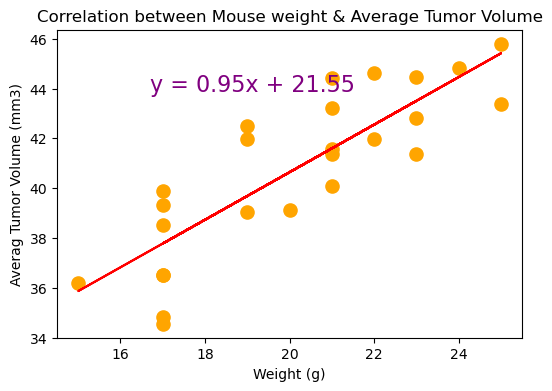

In [60]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_correlation = round(st.pearsonr(capomulin_weight_tumor_volume['Weight (g)'],capomulin_weight_tumor_volume['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin Regimen is: {capomulin_correlation}")

fig1, ax1 = plt.subplots(figsize=(6,4))
plt.scatter(capomulin_weight_tumor_volume['Weight (g)'],capomulin_weight_tumor_volume['Tumor Volume (mm3)'],s=90, color="orange")
plt.title("Correlation between Mouse weight & Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

# Add Linear Regression Line
x_values = capomulin_weight_tumor_volume['Weight (g)']
y_values = capomulin_weight_tumor_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="purple")

plt.show()